# Coin Sentiment

Tweets collected from more than 50 crypto influencers used to calculate compound sentiment score for specific coin.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from colour import Color

#%config InlineBackend.figure_format = 'svg'   # svg vs png format make sharper images!
%config InlineBackend.figure_format = 'retina' # much faster than svg when generating lots of points

In [173]:
df = pd.read_csv('tweets.csv', parse_dates=['created'])

In [174]:
len(df)

54110

In [66]:
df["user"].unique()

array(['@Tether_to', '@FTX_Official', '@LBank_Exchange', '@CoinBene',
       '@DigiFinex', '@upbitglobal', '@MXC_Exchange', '@OKEx',
       '@HuobiGlobal', '@justinkan', '@krakenfx', '@coinbase',
       '@CoinbasePro', '@binance', '@cz_binance', '@TheTradingTramp',
       '@BTC_JackSparrow', '@imBagsy', '@officialmcafee', '@MuroCrypto',
       '@CryptoWhalebot', '@stephendpalley', '@Hardwood_', '@bigmagicdao',
       '@ashtoshii', '@n2ckchong', '@GodwinYang', '@mhonkasalo',
       '@coingecko', '@George1Trader', '@ColdBloodShill', '@CryptoKaleo',
       '@CryptoMessiah', '@notsofast', '@Arthur_0x', '@StackingUSD',
       '@cryptoquant_com', '@ki_young_ju', '@dgntec', '@zhusu', '@redxbt',
       '@intocryptoast', '@BobTheJimbo', '@AlgodTrading', '@mgnr_io',
       '@nansen_ai', '@coinmamba', '@basedkarbon', '@AWice',
       '@AndreCronjeTech', '@CryptoCobain', '@RaoulGMI', '@razoreth',
       '@TheCryptoDog', '@HighStakesCap', '@john_j_brown', '@0x_b1'],
      dtype=object)

One user is selected for testing.

In [138]:
USER = "@intocryptoast"

In [144]:
print("The oldest tweet created at : "+str(df[df["user"]==USER]["created"].max()))

The oldest tweet created at : 2021-01-20 00:00:00


In [148]:
print("The oldest tweet created at : "+str(df[df["user"]==USER]["created"].min()))
print("The newest tweet created at : "+str(df[df["user"]==USER]["created"].max()))
print("Time window of collected tweets : "+str(df[df["user"]==USER]["created"].max()-df[df["user"]==USER]["created"].min())+" for "+USER)

The oldest tweet created at : 2020-09-03 00:00:00
The newest tweet created at : 2021-01-20 00:00:00
Time window of collected tweets : 139 days 00:00:00 for @intocryptoast


In [123]:
df[df["user"]==USER]["created"].max()

Timestamp('2021-01-19 00:00:00')

In [124]:
subset = df[df["user"]==USER][["created","text"]]

One coin is selected for testing.

In [158]:
COIN_SYMBOL = "eth"

In [159]:
filtered_subset = subset[subset['text'].str.lower().str.contains(COIN_SYMBOL)]

In [160]:
senti = SentimentIntensityAnalyzer()

In [161]:
scores = []
for tw in filtered_subset["text"]:
    scores.append(senti.polarity_scores(tw)['compound'])

In [162]:
colors = list(Color("red").range_to(Color("green"), 100)) # List of color codes between red and green
hex_colors = []
for score in scores:
    hex_colors.append(colors[round((score+1)*50)])

In [163]:
filtered_subset_ = filtered_subset.copy()

In [164]:
if not filtered_subset_.empty:
    filtered_subset_["compound_score"] = filtered_subset.apply(lambda x: senti.polarity_scores(x["text"])['compound'], axis=1)

In [165]:
filtered_subset_

,created,text,compound_score
46106,2021-01-14,#ETH2 https://t.co/FVLZm1eSnc,0.0000
46107,2021-01-13,Looks like @LidoFinance will break the magical...,0.4215
46124,2020-12-30,RT @lidofinance: You can now track Lido stakin...,0.0000
46128,2020-12-29,"🚨 New Nansen Research post out 🚨\n\n""A deep di...",0.0000
46142,2020-12-23,You can now follow @lidofinance ETH2 staking i...,0.5411
46154,2020-12-15,RT @ASvanevik: The largest entity (in # of wal...,0.0000
46163,2020-12-08,Our algorithms now pick the most informative w...,0.6476
46172,2020-12-01,Top ETH2 graffiti - see anyone you know? https...,0.2023
46173,2020-12-01,"ETH2 is launching, so we're offering a 1 Year ...",0.2732
46180,2020-11-26,RT @CreamdotFinance: #5 on the list of ETH con...,0.4404


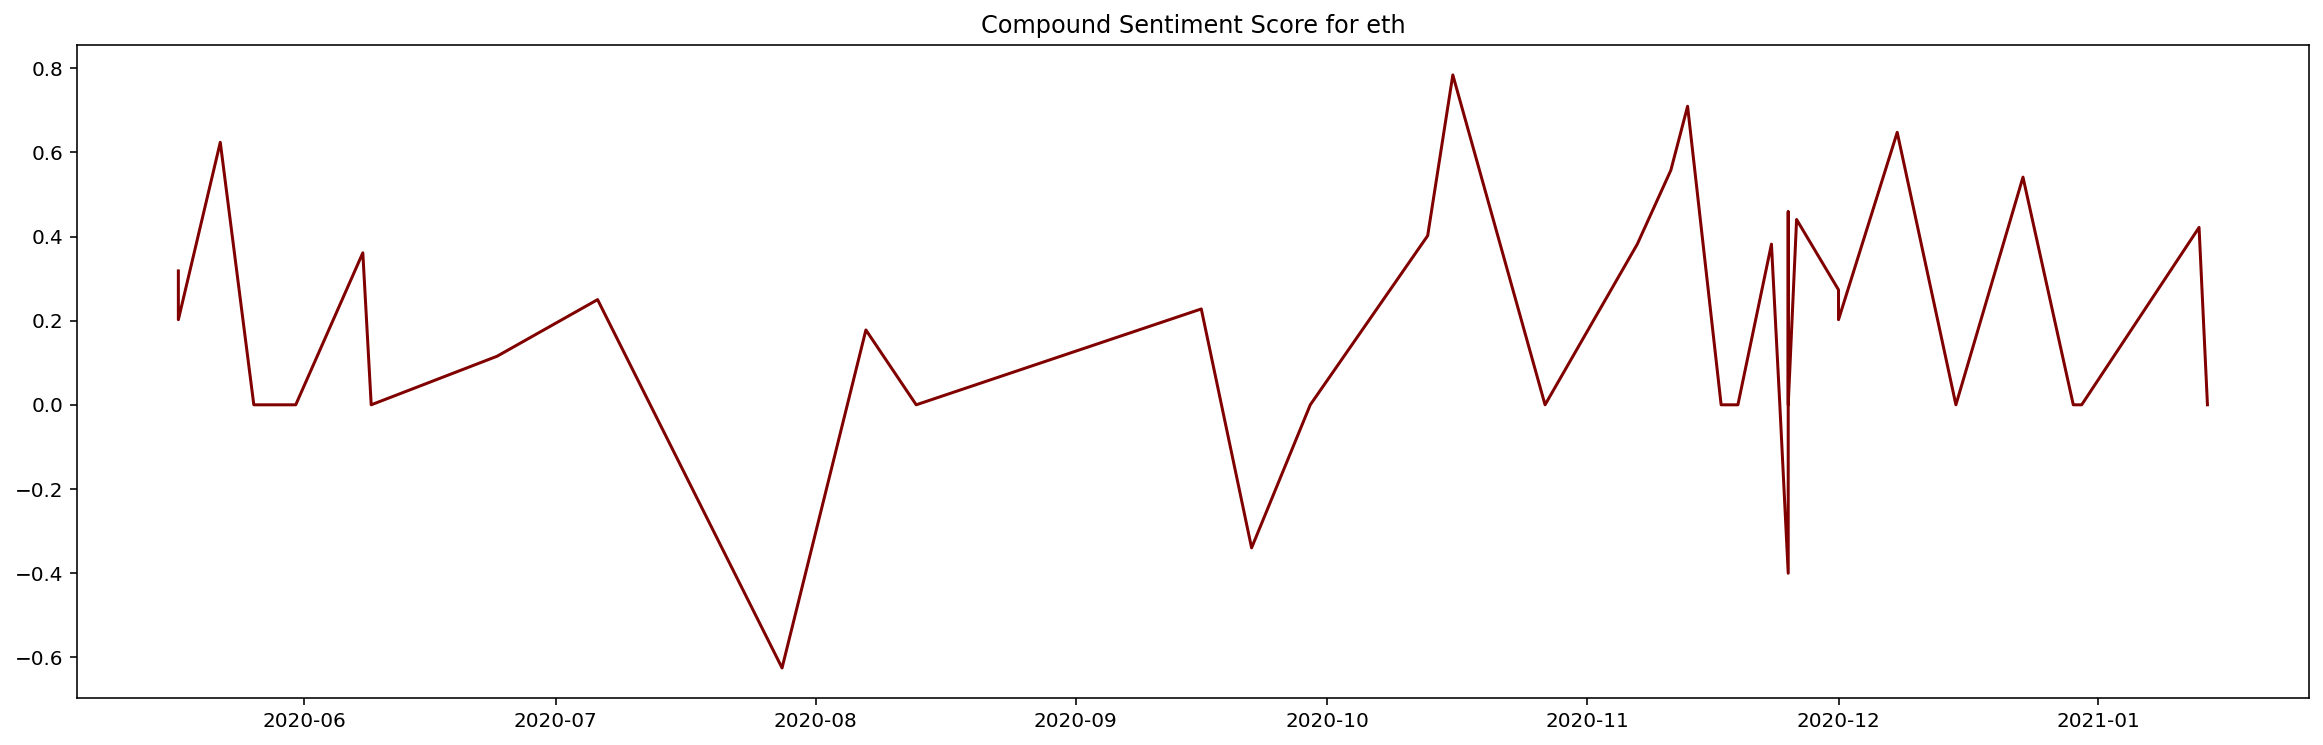

In [169]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(filtered_subset_["created"],filtered_subset_["compound_score"],color="maroon")
ax.set_title("Compound Sentiment Score for "+ COIN_SYMBOL)
plt.show()

In [167]:
from IPython.display import Markdown
for col,text in zip(hex_colors,filtered_subset_["text"]):
    display (Markdown('<span style="color: {}">{}</span>'.format(col,text)))

<span style="color: #bdbf00">#ETH2 https://t.co/FVLZm1eSnc</span>

<span style="color: #5da400">Looks like @LidoFinance will break the magical 32k ETH barrier today.

When it does, it will become a top 10 ETH2 depositor. https://t.co/gxznxOmfke</span>

<span style="color: #bdbf00">RT @lidofinance: You can now track Lido staking statistics with @nansen_ai's Lido dashboard.

▪️ Total ETH staked
▪️ stETH price + volume…</span>

<span style="color: #bdbf00">🚨 New Nansen Research post out 🚨

"A deep dive into arbitrage on decentralised exchanges"

Written by @weijie_eth and @darenfrankel 

Check it out: https://t.co/tC36HzgSVb</span>

<span style="color: #459c00">You can now follow @lidofinance ETH2 staking in this public dashboard: https://t.co/wnCpiCgVVQ

Enjoy!</span>

<span style="color: #bdbf00">RT @ASvanevik: The largest entity (in # of wallets) tracked in @nansen_ai is @binance - more than 2.6m Ethereum wallets 👀 https://t.co/kV0I…</span>

<span style="color: #339600">Our algorithms now pick the most informative wallet label for each address and displays it across dashboards.

Also, emojis help you understand if something is a:
🤖 Contract
🏦 Exchange
🤓 Smart Money
... and more

Let us know what you think!

Top $YFI balances below: https://t.co/qqn0PqZYL5</span>

<span style="color: #8cb200">Top ETH2 graffiti - see anyone you know? https://t.co/9UkshOyYuH</span>

<span style="color: #7aad00">ETH2 is launching, so we're offering a 1 Year Nansen subscription for only 2 ETH today.

This offer is limited to 32 people. 😎

Claim it before we run out: https://t.co/VQAeOqpzv6</span>

<span style="color: #59a300">RT @CreamdotFinance: #5 on the list of ETH contributors into the Eth2 Deposit Contract. Doing our part in supporting the Eth2 launch

Stake…</span>

<span style="color: #bdbf00">RT @proofofjk: I started using @nansen_ai for DeFi and now I'm using it to track #ETH2 staking. One of the "must subscribe" in the space :)…</span>

<span style="color: #55a100">RT @stakefish: Over 700,000 ETH has already been deposited to launch more than 20,000 #eth2 validators (almost 8% of them with stakefish 😎)…</span>

<span style="color: #69a800">RT @dcarmitage: @ValidatorEth @R_Tyler_Smith @nansen_ai Yep! Not including Vitalik or the Ethereum Foundation, there were 11 ETH ICO Partic…</span>

<span style="color: #d98300">RT @coingecko: 🚨 Alpha Leak
Need on-chain analytics and yield farming intel on $ETH?

Say hello to @nansen_ai! A 7-day starter pack is now…</span>

<span style="color: #bdbf00">RT @bravenewcoin: 🎙️On the Crypto Conversation podcast @ASvanevik
from the @nansen_ai  analytics platform for the Ethereum blockchain is he…</span>

<span style="color: #65a600">More than 1,000 addresses have now deposited to ETH 2.0 contract 🥳 https://t.co/BMQB6I6mzR</span>

<span style="color: #bdbf00">Nansen users can follow ETH2 deposits with this new dash: https://t.co/fAJhC6aTnX

Check it out! https://t.co/u4DvyJJ8tK</span>

<span style="color: #bdbf00">Breaking 100k ETH deposited today? #ETH2 https://t.co/kBXlSxEpBH</span>

<span style="color: #299200">Happy we could contribute to SIMP #1.

Also, sorry jokap.eth 😅 https://t.co/QQl4pKG87r</span>

<span style="color: #429b00">Nansen uses @OpenEthereumOrg so we are currently unaffected by the Infura incident.

Monitoring the situation, and hope it gets resolved soon for those impacted.</span>

<span style="color: #65a600">RT @crypto_rex: Looking at @nansen_ai's Top ETH Balance's table, it can be seen that the eth_2 deposit contract, will be the 15th top eth h…</span>

<span style="color: #bdbf00">RT @Crypto_Briefing: #Ethereum analytics firm @nansen_ai is a subscription-based data startup bootstrapped by Alex Svanevik, Evgeny Medvede…</span>

<span style="color: #1c8d00">Happy to announce some good news - three at once!

1. Ethereum 2.0 - Medalla Dashboard
2. Nansen Research website
3. Ethereum 2.0 ETL

(thread)</span>

<span style="color: #61a500">RT @CxDefi: Nansen Brings Transparency To Ethereum And Smart Contracts @nansen_ai #Blockchain #Data #Ethereum 

https://t.co/Yecp8gpeVB</span>

<span style="color: #bdbf00">RT @masonnystrom: Coinbase holds ~8.7 million ether (just over $3 billion USD at today's prices). 

For reference, Coinbase's Series E roun…</span>

<span style="color: #d58e00">RT @defiprime: We listed Nansen 🔥 

Nansen is an analytics platform for #Ethereum, which combines on-chain data with a massive and constant…</span>

<span style="color: #88b100">RT @mosayeri: The best analytics tool for DeFi and Ethereum is @ASvanevik's https://t.co/dgY3L3FJUJ.
Can't say enough great things about @n…</span>

<span style="color: #bdbf00">Why are people moving BTC to Ethereum? 🤔

⭐️ New video just published ⭐️
https://t.co/PrsgVV8ZuO</span>

<span style="color: #91b300">One of our internal product KPIs is ETH Volume Coverage.

In brief, it measures what % of all ETH transacted on-chain we can attributed to labeled senders/recipients.

It's been growing steadily over the last year - almost 65% (on average) for 2020: https://t.co/K8RrymNmLj</span>

<span style="color: #e75900">Our Early Bird offer still has a few slots left!

For ~0.96 ETH you get 90 days access to Nansen.

Not sure it's worth it? Try it out for 7 days first, with no commitment: https://t.co/1laNELHdLF</span>

<span style="color: #83af00">RT @alex_kroeger: @BobMcElrath We'll see how it plays out. Data shows (@nansen_ai) roughly 1/3 of ETH in qualifying validator addresses bel…</span>

<span style="color: #9fb700">RT @spencernoon: This morning the Plus Token scam moved 789k ETH

Unclear if they're trying to sell but FYI their wallets have interacted w…</span>

<span style="color: #bdbf00">RT @decryptmedia: Data from @ArcaneResearch and @nansen_ai shows that Ethereum wallets with at least 32 ETH, the amount required for ETH 2.…</span>

<span style="color: #69a800">RT @ArcaneResearch: 👀Another sneak peek into our weekly market report👀
Are investors getting ready for Ethereum staking? Data from @nansen_…</span>

<span style="color: #bdbf00">Check out this piece by @joel_john95 on ETH account balances: https://t.co/9DisRciERL</span>

<span style="color: #bdbf00">RT @spencernoon: #9: Post-Black Thursday (March 12) there has been a net outflow of $ETH from exchanges, with 62% of days showing net outfl…</span>

<span style="color: #379700">RT @AlexanderFisher: Over 2600 BTC have been locked and wrapped into WBTC on #Ethereum and deposited to MakerDAO as collateral. Wow!</span>

<span style="color: #8cb200">These are the top ETH depositors to Bitfinex since Feb 15: https://t.co/i1ViXHOgmB https://t.co/m6cs3z1n5W</span>

<span style="color: #72aa00">&gt;40% increase in ETH held by @bitfinex since mid-February.

It's now the 2nd largest ETH holder among exchanges. https://t.co/ywU8Z096FN</span>